# Multiclass Dog Breed Classification

This notebook builds a multiclass image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

## 2. Data

The data is from Kaggle's dog breed identification competetion.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Information of the data:

* We have images(unstructured data) so it is best to use deep learning/transfer learning.

* There are 120 breeds of dogs i.e 120 different classes.

* There are around 10,000 images in the training and test sets.

In [0]:
# Unzip the uploaded data into Google Drive
# !unzip "/content/drive/My Drive/Dog Eyes/dog-breed-identification.zip" -d "/content/drive/My Drive/Dog Eyes/"

### Get our workspace ready

* Import Tensorflow 2.x
* Import Tensorflow Hub
* Make sure we're using a GPU

In [0]:
# # Import TensorFlow into Colab
# import tensorflow as tf
# print("TF version", tf.__version__)

In [3]:
# Import TF 2.x
try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [4]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version", tf.__version__)
print("TF Hub version", hub.__version__)

# Check for GPU availability
print("GPU", "available!" if tf.config.list_physical_devices("GPU") else "not available")

TF version 2.1.0
TF Hub version 0.7.0
GPU available!


### Getting our data ready (turning it into Tensors):

Data has to be converted into numerical format. i.e we will turn images into Tensors

In [5]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/My Drive/Dog Eyes/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     220b9f4199980cddc4eb6a38d361b03b  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


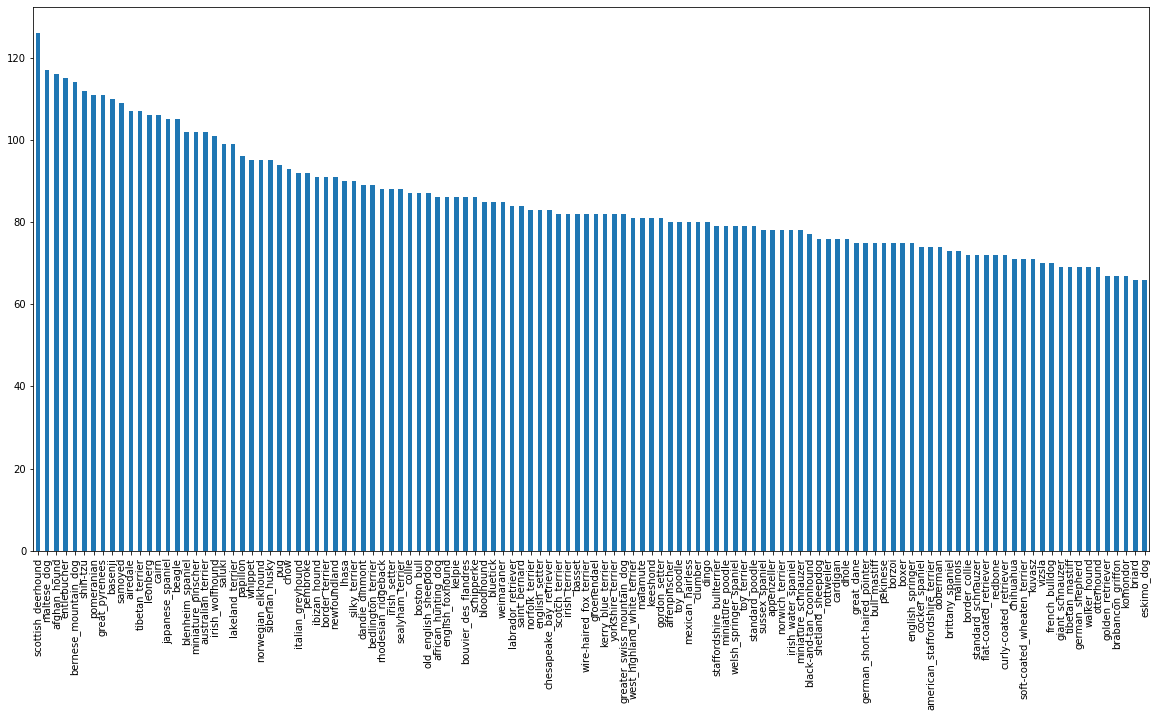

In [6]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize = (20,10));

In [7]:
labels_csv["breed"].value_counts().mean()

85.18333333333334

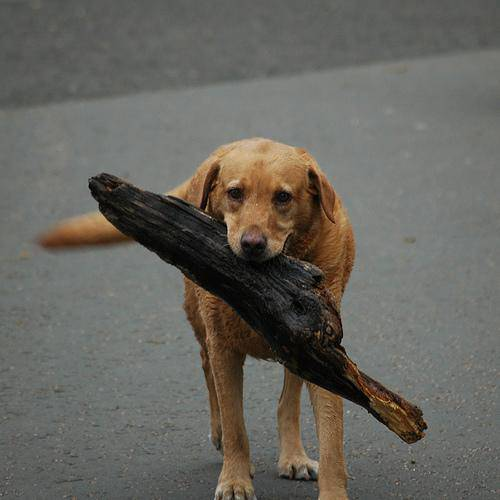

In [8]:
# Let's view an image
from IPython.display import Image
Image("/content/drive/My Drive/Dog Eyes/train/0021f9ceb3235effd7fcde7f7538ed62.jpg")

### Getting images and their labels

Create pathnames from image ID's

In [9]:
# Creating pathnames from image ID's

filenames = ["/content/drive/My Drive/Dog Eyes/train/"+fname+".jpg" for fname in labels_csv["id"]]
filenames[:10]

['/content/drive/My Drive/Dog Eyes/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/Dog Eyes/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/Dog Eyes/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/Dog Eyes/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/Dog Eyes/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/Dog Eyes/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/Dog Eyes/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/Dog Eyes/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/Dog Eyes/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/Dog Eyes/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("/content/drive/My Drive/Dog Eyes/train/")) == len(filenames):
  print("Files match!")
else:
  print("error: Files don't match!")

Files match!


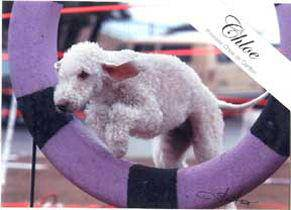

In [11]:
# Check if the filenames are correct
Image(filenames[23])

In [12]:
labels_csv["breed"][23]

'bedlington_terrier'

In [13]:
# Preparing the labels

import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [14]:
len(labels)

10222

In [15]:
# See if number of labels matches number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("error: length doesn't match")

Number of labels matches number of filenames!


In [16]:
# Find the unique label values
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [17]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [18]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [19]:
# Turning boolean array into integers
# Example
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the label occurs in the array

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating a validation set

In [0]:
# Setup X and y variables
X = filenames
y = boolean_labels

Starting with ~1000 images and increase as needed.

In [0]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type: "slider", min: 1000, max: 10000, step: 1000}

In [22]:
# Split the data into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

### Preprocessing images(turning images into Tensors)

For preprocessing the images, writing a function that does the following:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable `image`
3. Convert `image` (.jpg) to Tensors
4. Resize the `image` to be a shape of (224, 224)
5. Return the modified `image`

In [23]:
# Convert image to NumPy array
from matplotlib.pyplot import imread

image = imread(filenames[42])
image.shape

(257, 350, 3)

In [24]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [25]:
image.max(), image.min() # images are RGB pixel values from 0 to 255

(255, 0)

In [26]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [27]:
# Turning images into a Tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [0]:
# Writing a function to preprocess the images
IMG_SIZE = 224 # define the size of the image

def process_image(image_path):
  """
  Takes an image path as an input and returns a Tensor for that image
  """
  # Read an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into a numerical Tensor with 3 color channels(R,G,B)
  image = tf.image.decode_jpeg(image, channels=3) # returns a same sort of data as shown on the above cell
  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32) #normalisation
  # Resize the image to our desired value (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  
  return image

### Turning data into batches
If 10,000 images are tried to process at one go, it may not fit into memory. So, we divide them into batches

Now, trying 32 images at a time.

We need the data in the form of Tensor tuples `(image, label)` for using TensorFlow effectievely.

In [0]:
# Function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path and it's associated label and returns a tuple (image, label)
  """
  image = process_image(image_path)
  return image, label

In [0]:
# Function to turn data into batches
BATCH_SIZE = 32
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data.
  Also accepts test data as input(no labels)
  """
  # If the data is a test dataset, there are no labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only file paths
    data_batch = data.map(process_image).batch(BATCH_SIZE) # applies the process_image function to all the filepaths in X and splits it into batches
    return data_batch
  # If the data is a valid dataset, we do not need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y))) # file paths and labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE) # applies the process_image function to all the filepaths in X and labels in y and splits it into batches
    return data_batch
  # If the data is a training dataset, we will shuffle it
  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y))) # file paths and labels
    # Shuffling pathnames and labels
    data = data.shuffle(buffer_size=len(X)) 
    data_batch = data.map(get_image_label).batch(BATCH_SIZE) # applies the process_image function to all the filepaths in X and splits it into batches
    return data_batch

In [31]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data= True)

Creating training data batches...
Creating validation data batches...


In [32]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualising Data Batches
Visualising the data that we made into batches

In [0]:
import matplotlib.pyplot as plt

# Create a function for veiwing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  plt.figure(figsize=(10,10))
  # Loop through 25
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [34]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.41515437, 0.19946808, 0.1720171 ],
          [0.37869743, 0.17085429, 0.13948174],
          [0.36193058, 0.15503281, 0.12334514],
          ...,
          [0.29701486, 0.10125153, 0.07380054],
          [0.29280463, 0.10064777, 0.07319678],
          [0.29280463, 0.10064777, 0.07319678]],
 
         [[0.40806067, 0.19237438, 0.1649234 ],
          [0.40548262, 0.19763947, 0.1662669 ],
          [0.37599018, 0.16909242, 0.13740474],
          ...,
          [0.28789535, 0.0939433 , 0.06649231],
          [0.28233546, 0.09017858, 0.06272759],
          [0.28233546, 0.09017858, 0.06272759]],
 
         [[0.4370794 , 0.22139311, 0.19394213],
          [0.43267584, 0.2248327 , 0.19346014],
          [0.39105853, 0.18416077, 0.15247308],
          ...,
          [0.28235295, 0.09019608, 0.0627451 ],
          [0.2784314 , 0.08627451, 0.05882353],
          [0.2784314 , 0.08627451, 0.05882353]],
 
         ...,
 
         [[0.14872189, 0.06765511, 0.0639789 ],
          [0.16213

In [35]:
len(train_images), len(train_labels)

(32, 32)

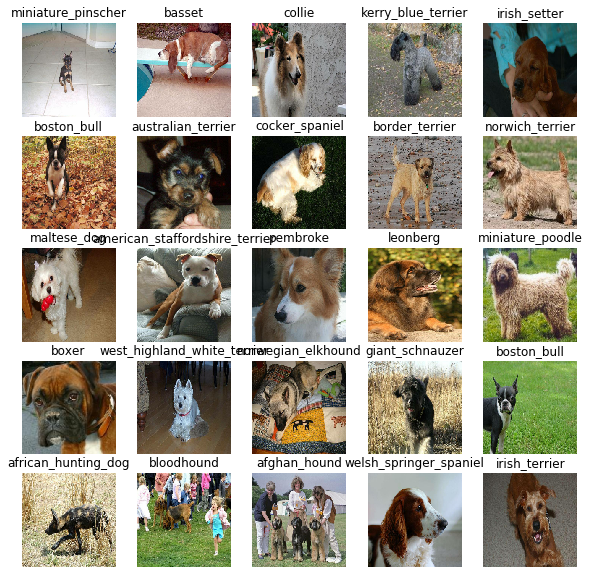

In [36]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

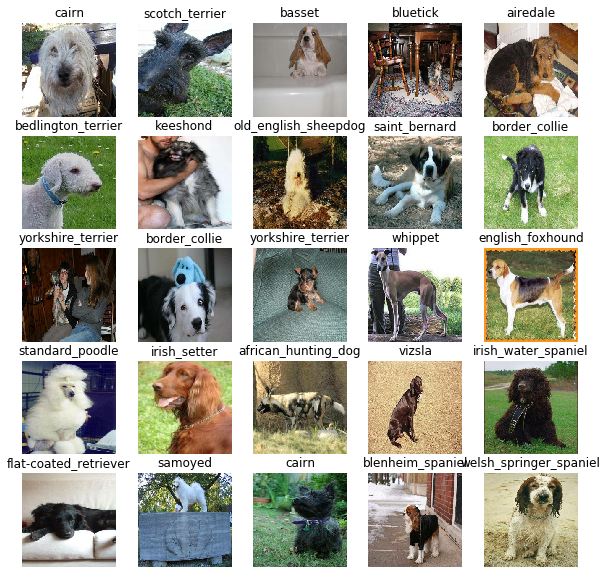

In [37]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## 5. Building a model

Defining:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use.

In [0]:
# Setup input shape to model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #batch, height, width, color channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL ="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

### Creating a Keras deep learning model

Create a function which:
* Takes the input shape, output shape and the model
* Defines the layers in a Keras model in sequential fashion
* Compiles the model
* Builds the model
* Returns the model

https://www.tensorflow.org/guide/keras/overview

In [0]:
# Creating the function to build a Keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)
  # Setup the model layers
  model = tf.keras.Sequential([
                               hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                     activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [40]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Creating callbacks

Create helper functions a model can use during training to do such things as save its progress or stop training early if the model stops improving.

Creating two callbacks:

* One for TensorBoard which helps track our model's progress
* Another for early stopping which prevents our model from training for too long 

In [0]:
# TensorBoard Callback

# Load the TensorBoard notebook extension
%load_ext tensorboard

In [0]:
import datetime

# Create a function to build TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/My Drive/Dog Eyes/logs",
                        # Make it so that the logs get tracked whenver we run an eperiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [0]:
# Early Stopping Callback

# Prevents our model from overfitting by stopping training if certain  evaluation metric stops improving
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

### Training a model on a subset of data

Training on a 1000 images to test if everything is working

In [0]:
NUM_EPOCHS = 100 #@param {type: "slider", min:10, max:100, step:10}

In [0]:
# Function to train a model

def train_model():
  """
  Trains a given model and returns the trained version
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data, 
            epochs=NUM_EPOCHS, 
            validation_data=val_data, 
            validation_freq=1, 
            callbacks=[tensorboard, early_stopping])
  
  # Return the fitted model
  return model

In [46]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Train for 25 steps, validate for 7 steps
Epoch 1/100
25/25 [==============================] - 393s 16s/step - loss: 4.5452 - accuracy: 0.1063 - val_loss: 3.4714 - val_accuracy: 0.2300
Epoch 2/100
25/25 [==============================] - 5s 181ms/step - loss: 1.6069 - accuracy: 0.6950 - val_loss: 2.1532 - val_accuracy: 0.4850
Epoch 3/100
25/25 [==============================] - 5s 182ms/step - loss: 0.5756 - accuracy: 0.9287 - val_loss: 1.7045 - val_accuracy: 0.5750
Epoch 4/100
25/25 [==============================] - 5s 183ms/step - loss: 0.2504 - accuracy: 0.9825 - val_loss: 1.4769 - val_accuracy: 0.6300
Epoch 5/100
25/25 [==============================] - 5s 181ms/step - loss: 0.1496 - accuracy: 1.0000 - val_loss: 1.4085 - val_accuracy: 0.6650
Epoch 6/100
25/25 [==============================] - 5s 181ms/step - loss: 0.1006 - accuracy: 1.0000 - val_loss: 1.3623 - val_accuracy: 0.6550
Epoch 7/

Model is performing better on the training set 1.0 accuracy than in the validation set. Which means the model is overfitting.

### Checking the TensorBoard logs

In [47]:
%tensorboard --logdir /content/drive/My\ Drive/Dog\ Eyes/logs 

Output hidden; open in https://colab.research.google.com to view.

### Making and evaluating predictions using a trained model

In [48]:
# Make predictions on the validation data
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 183ms/step


array([[4.72478056e-03, 6.04444031e-05, 8.61154869e-04, ...,
        3.79336823e-04, 4.24920727e-05, 1.39436673e-03],
       [1.92756008e-03, 3.96067335e-04, 1.79531593e-02, ...,
        5.27465157e-03, 1.62137358e-03, 1.30824308e-04],
       [2.80452914e-05, 9.75541407e-05, 7.10530730e-05, ...,
        2.44793900e-05, 1.59158240e-04, 3.70199280e-03],
       ...,
       [2.69641696e-05, 1.08010056e-04, 1.26064460e-05, ...,
        2.41897360e-05, 8.88918119e-04, 1.02393606e-04],
       [3.96810239e-03, 3.16021731e-04, 7.56872832e-05, ...,
        2.15193431e-04, 9.61358310e-05, 6.46360265e-03],
       [2.92012148e-04, 7.39178722e-05, 8.04477953e-04, ...,
        9.32077318e-03, 3.96940578e-03, 2.21450246e-04]], dtype=float32)

In [49]:
predictions.shape

(200, 120)

In [50]:
index = 23
print(predictions[index])
print(f"Max value(probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[1.44587888e-04 1.86365345e-04 6.22644507e-07 3.87476030e-06
 2.73867881e-05 6.37405901e-05 3.61896418e-05 1.52589546e-05
 2.39278120e-03 1.34282964e-04 1.79230733e-06 2.30888231e-03
 5.29614624e-07 8.52094710e-01 9.03507680e-05 7.09075539e-06
 5.77310384e-05 4.20957986e-06 5.42310700e-05 4.18510026e-05
 1.31456518e-05 8.22240781e-06 3.08981430e-06 2.41551015e-06
 1.75478563e-04 4.68820099e-06 3.15736384e-06 2.77186132e-06
 2.56508110e-06 6.19690036e-06 1.11819418e-05 5.85572379e-05
 3.99673125e-03 3.06049507e-04 1.86714556e-06 4.31518347e-05
 6.27397867e-06 9.90878652e-06 5.28895680e-06 1.50616352e-05
 8.76430306e-04 7.80278515e-06 8.18709964e-07 2.95726250e-06
 5.35558456e-06 2.37915447e-06 1.37234165e-05 6.74361290e-05
 1.48721138e-05 1.27232925e-03 4.13891714e-04 9.43837620e-07
 1.68403913e-05 8.37666521e-05 9.68370500e-07 2.10581802e-05
 3.09369207e-04 7.13060654e-05 2.55104515e-05 6.08725531e-06
 6.84895622e-06 6.84535247e-04 1.13752515e-06 1.23402071e-06
 6.63749552e-06 3.706705

In [0]:
# Turn prediction probabilities into their respectieve labels
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

In [52]:
# Get a perdicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

In [53]:
# Function to unbatch the data'
def unbatchify(data):
  """
  Takes a batched dataset of (image,label) Tensors and returns seperate arrays of images and labels.
  """
  images = []
  labels = []

  # Loop through the data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatch the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

### Visualising predictions

Create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and integers.
* Convert the prediction probabilities to a predicted label.
*Plot the predicted label, its predicted probability, the truth label and the target image on a single plot.


In [0]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the predicion, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

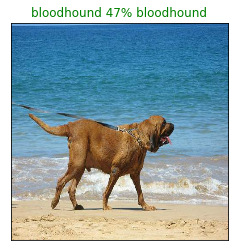

In [55]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=100)

In [0]:
# Function to output our top 10 predictions

def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plot the to 10 prection confidence along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = "vertical")
  # Change the color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

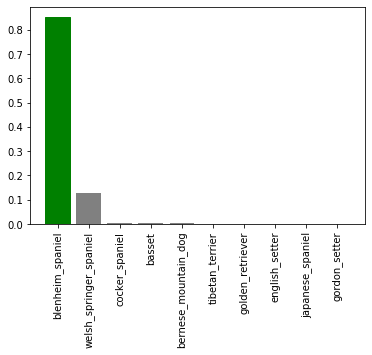

In [57]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=23)

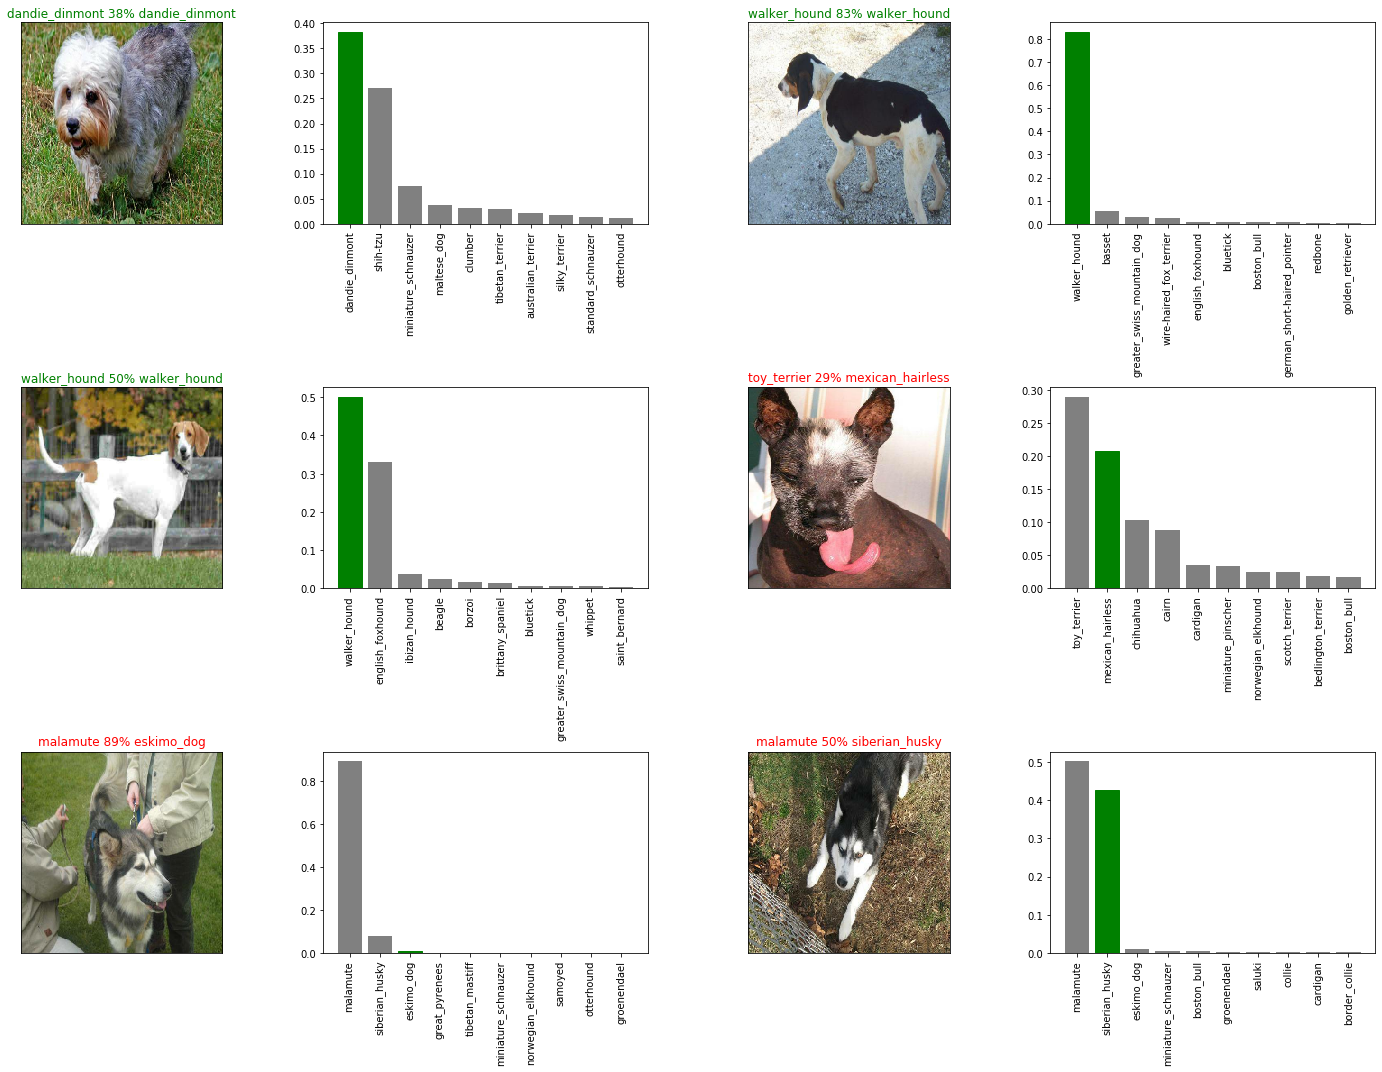

In [58]:
# Testing out a few predictions and their visualisations
i_multipler = 30
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multipler)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multipler)
plt.tight_layout(h_pad=1.0)
plt.show()

### Saving and reloading the trained model

In [0]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("/content/drive/My Drive/Dog Eyes/models/",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [0]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [61]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: /content/drive/My Drive/Dog Eyes/models/20200307-04441583556265-1000-images-mobilenetv2-Adam.h5...


'/content/drive/My Drive/Dog Eyes/models/20200307-04441583556265-1000-images-mobilenetv2-Adam.h5'

In [62]:
# Load the model
loaded_100_image_model = load_model('/content/drive/My Drive/Dog Eyes/models/20200306-19061583521607-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: /content/drive/My Drive/Dog Eyes/models/20200306-19061583521607-1000-images-mobilenetv2-Adam.h5


In [63]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 2s 289ms/step - loss: 1.2393 - accuracy: 0.6700


[1.239255496433803, 0.67]

In [64]:
# Evaluate the loaded model
loaded_100_image_model.evaluate(val_data)

7/7 [==============================] - 1s 184ms/step - loss: 1.2496 - accuracy: 0.6850


[1.2496076566832406, 0.685]

### Training the model on the full data

In [65]:
# Create a data batch with the full data set
full_data = create_data_batches(X,y)

Creating training data batches...


In [66]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [67]:
# Create a model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
# Create callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on the full data, so we can't monitor validation accuracy. i.e no early stopping
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [69]:
# Fit the full model to the data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Train for 320 steps
Epoch 1/100
320/320 [==============================] - 4551s 14s/step - loss: 1.3219 - accuracy: 0.6699
Epoch 2/100
320/320 [==============================] - 49s 154ms/step - loss: 0.3937 - accuracy: 0.8824
Epoch 3/100
320/320 [==============================] - 50s 157ms/step - loss: 0.2323 - accuracy: 0.9380
Epoch 4/100
320/320 [==============================] - 51s 159ms/step - loss: 0.1524 - accuracy: 0.9648
Epoch 5/100
320/320 [==============================] - 51s 158ms/step - loss: 0.1044 - accuracy: 0.9789
Epoch 6/100
320/320 [==============================] - 51s 160ms/step - loss: 0.0768 - accuracy: 0.9857
Epoch 7/100
320/320 [==============================] - 51s 159ms/step - loss: 0.0582 - accuracy: 0.9916
Epoch 8/100
320/320 [==============================] - 51s 158ms/step - loss: 0.0456 - accuracy: 0.9947
Epoch 9/100
320/320 [==============================] - 51s 159ms/step - loss: 0.0397 - accuracy: 0.9949
Epoch 10/100
320/320 [======================

In [70]:
# Save the model
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: /content/drive/My Drive/Dog Eyes/models/20200307-06321583562751-full-image-set-mobilenetv2-Adam.h5...


'/content/drive/My Drive/Dog Eyes/models/20200307-06321583562751-full-image-set-mobilenetv2-Adam.h5'

In [71]:
# Load the full model
loaded_full_model = load_model('/content/drive/My Drive/Dog Eyes/models/20200307-06321583562751-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: /content/drive/My Drive/Dog Eyes/models/20200307-06321583562751-full-image-set-mobilenetv2-Adam.h5


## 6. Making predictions on the test dataset

Get the test data into the right format. We can use the `create_data_batches()` for that.

Steps:
* Get the test image filename
* Convert the filenames into test data batches
* `create_data_batches()` and setting the `test_data` parameter to `True`
* Make a predictions array by passing the test batches to the `predict()` method called on our model

In [72]:
# Load test image filenames
test_path = "/content/drive/My Drive/Dog Eyes/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/My Drive/Dog Eyes/test/ed63374c99282b3081705ed84a2b93bc.jpg',
 '/content/drive/My Drive/Dog Eyes/test/f155d5fe889d139892c1d7d46804f419.jpg',
 '/content/drive/My Drive/Dog Eyes/test/e967dd3dc67352cc2525c8283bf2751d.jpg',
 '/content/drive/My Drive/Dog Eyes/test/e9bdf2bcc823964c7375397a7c06242e.jpg',
 '/content/drive/My Drive/Dog Eyes/test/e904aa7e76ba608b3f658aa3817e12b9.jpg',
 '/content/drive/My Drive/Dog Eyes/test/ef1710d5cb79a5e0b46f7b9a101a25b4.jpg',
 '/content/drive/My Drive/Dog Eyes/test/f4a2ee1dd5542da8b0150fe8f7a2b7c3.jpg',
 '/content/drive/My Drive/Dog Eyes/test/f41a03e617bde76fef19ec1cf1355d59.jpg',
 '/content/drive/My Drive/Dog Eyes/test/f59518330db44c70a9bad7e8a4314f3b.jpg',
 '/content/drive/My Drive/Dog Eyes/test/f532b476d5d46f4ba89b22449e3c147d.jpg']

In [73]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [74]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [75]:
# Make predictions on the test data batch
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)
# Will take time as we are again using a new set of 10,000+ images

324/324 [==============================] - 4616s 14s/step


In [0]:
# Save predictions to csv file
np.savetxt("/content/drive/My Drive/Dog Eyes/preds_array.csv", test_predictions, delimiter=",")

In [0]:
# Load predictions array from csv file
test_predictions = np.loadtxt("/content/drive/My Drive/Dog Eyes/preds_array.csv", delimiter=",")

In [79]:
test_predictions.shape

(10357, 120)

## 7. Preparing test dataset predictions for Kaggle

As per the sample submission file, the output shouldbe the prediction probability of the model in a DataFrame with an ID and a column for each different dog breed.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

Steps:
* Create a pandas DataFrame with an ID column as well as a column for each dog breed
* Add data to the ID column by extracting the test image ID's from their filepaths
* Add data (the prediction probabilities) to each of the dog breed columns
* Export the DataFrame as a CSV to submit it to Kaggle

In [80]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [0]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [84]:
preds_df.head()

id  ... yorkshire_terrier
0  ed63374c99282b3081705ed84a2b93bc  ...               NaN
1  f155d5fe889d139892c1d7d46804f419  ...               NaN
2  e967dd3dc67352cc2525c8283bf2751d  ...               NaN
3  e9bdf2bcc823964c7375397a7c06242e  ...               NaN
4  e904aa7e76ba608b3f658aa3817e12b9  ...               NaN

[5 rows x 121 columns]

In [87]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  ... yorkshire_terrier
0  ed63374c99282b3081705ed84a2b93bc  ...       5.13134e-13
1  f155d5fe889d139892c1d7d46804f419  ...       8.18172e-10
2  e967dd3dc67352cc2525c8283bf2751d  ...       4.89601e-08
3  e9bdf2bcc823964c7375397a7c06242e  ...       2.29181e-10
4  e904aa7e76ba608b3f658aa3817e12b9  ...       1.92039e-06

[5 rows x 121 columns]

In [0]:
# Save predictions for submission to Kaggle
preds_df.to_csv("/content/drive/My Drive/Dog Eyes/full_model_predictions_submission_1_mobilenetv2.csv", index=False)

## 8. Making predictions on custom images

To make predictions on custom images:
* Get the filepaths of the images
* Turn the filepaths into data batches
* Passing the data batch to our model
* Convert the prediction output probabilities to prediction labels
* Compare the predicted label to the images

In [0]:
# Get custom image filepaths
custom_path = "/content/drive/My Drive/Dog Eyes/custom-images/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [97]:
custom_image_paths

['/content/drive/My Drive/Dog Eyes/custom-images/border-collie.png',
 '/content/drive/My Drive/Dog Eyes/custom-images/german-shepherd.png',
 '/content/drive/My Drive/Dog Eyes/custom-images/labrador.png']

In [98]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating test data batches...


In [0]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [100]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['collie', 'german_shepherd', 'labrador_retriever']

In [0]:
# Get custom images
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

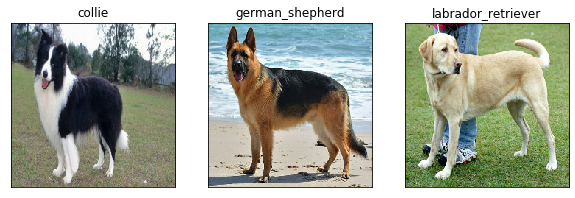

In [102]:
# Check custom image predictions
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)

That is 100 % correct
Dayum!